In [58]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
import sys
sys.path.append('..')
import time
import joblib
from datetime import datetime
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from fence.neris_attack_tf2 import Neris_attack
from training.helpers import  read_min_max
from tensorflow.random import set_seed
import matplotlib.pyplot as plt
"""
set_seed(2)
from numpy.random import seed
seed(2)
"""



'\nset_seed(2)\nfrom numpy.random import seed\nseed(2)\n'

In [59]:
import random
np.random.seed(500)


import warnings
warnings.filterwarnings('ignore')




In [66]:
def attack(method, model_path, samples_path, labels_path, distance, iterations, mask_idx, eq_min_max, only_botnet=True): 
    samples = np.load(samples_path)
    labels = np.load(labels_path)
    
    if only_botnet:
        idx = np.where(labels == 1)[0][:407]
        labels = labels[idx]
        samples = samples[idx]
    
    model = load_model(model_path)

    if method == "neris":
        perturbSamples = []
        distances = []  # List to store distances during the attack
        modified_indices = []  # List to store indices of modified samples
        attack_generator = Neris_attack(model_path=model_path, iterations=iterations, distance=distance, scaler=scaler, mins=min_features, maxs=max_features)
        
        for i in range(samples.shape[0]):
            
            sample = samples[i]
            sample = np.expand_dims(sample, axis=0)
            label = labels[i]
            
            # Generate an adversarial example using the Neris attack
            adversary = attack_generator.run_attack(sample, label)
            
            # Check if the sample was modified
            if not np.array_equal(sample, adversary):
                modified_indices.append(i)
            
            perturbSamples.append(adversary)
            
        
        perturbSamples = np.squeeze(np.array(perturbSamples))
        
    
    # Print modified sample information
    num_modified_indices = len(modified_indices)
    print("Number of Modified Samples:", num_modified_indices)
    print("Modified Sample Indices:", modified_indices)
    
    return  num_modified_indices


Attack number: 4
Number of Modified Samples: 329
Modified Sample Indices: [9, 18, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36, 38, 39, 40, 41, 42, 43, 44, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 136, 137, 138, 139, 141, 142, 143, 144, 145, 146, 147, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 209, 210, 211, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 226, 228, 229, 231, 233, 234, 235, 236, 237, 23

Number of Modified Samples: 329
Modified Sample Indices: [9, 18, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36, 38, 39, 40, 41, 42, 43, 44, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 136, 137, 138, 139, 141, 142, 143, 144, 145, 146, 147, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 209, 210, 211, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 226, 228, 229, 231, 233, 234, 235, 236, 237, 238, 239, 240, 241,

Number of Modified Samples: 329
Modified Sample Indices: [9, 18, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36, 38, 39, 40, 41, 42, 43, 44, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 136, 137, 138, 139, 141, 142, 143, 144, 145, 146, 147, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 209, 210, 211, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 226, 228, 229, 231, 233, 234, 235, 236, 237, 238, 239, 240, 241,

Number of Modified Samples: 329
Modified Sample Indices: [9, 18, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36, 38, 39, 40, 41, 42, 43, 44, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 136, 137, 138, 139, 141, 142, 143, 144, 145, 146, 147, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 209, 210, 211, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 226, 228, 229, 231, 233, 234, 235, 236, 237, 238, 239, 240, 241,

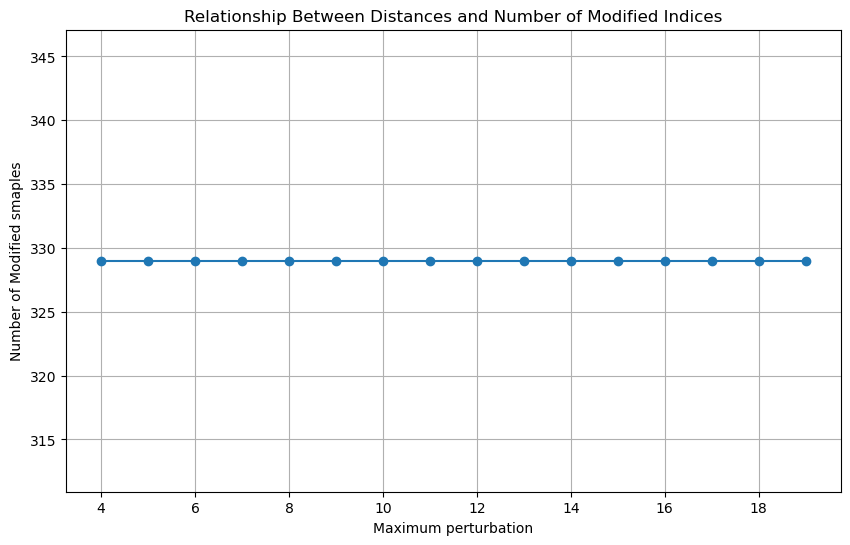

In [67]:
# Plotting
distances_list = []
num_modified_indices_list = []

for i in range(4, 20):
    distance = i
    print('Attack number:', i)
    scaler = joblib.load('../data/neris/scaler.pkl')
    min_features, max_features = read_min_max('../data/neris/minimum.txt', '../data/neris/maximum.txt')
    mask_idx = np.load('../data/neris/mutable_idx.npy')
    eq_min_max = np.load('../data/neris/eq_min_max_idx.npy')
    start_time = datetime.now()
    num_modified_indices = attack('neris',  '../out/neris/clean_10epochs/clean_model.h5', '../data/neris/testing_samples.npy', '../data/neris/testing_labels.npy', distance=i, iterations=100, mask_idx=mask_idx, eq_min_max=eq_min_max)
    end_time = datetime.now()
    print('Duration: {}'.format(end_time - start_time))

    distances_list.append(distance)
    num_modified_indices_list.append(num_modified_indices)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(distances_list, num_modified_indices_list, marker='o')
plt.xlabel('Maximum perturbation')
plt.ylabel('Number of Modified smaples')
plt.title('Relationship Between Distances and Number of Modified Indices')
plt.grid(True)
plt.show()